In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [4]:
NETS = []
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)
net.uuid = 'IPMLB'

In [3]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()

a


In [6]:
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana, True)

working on slice 0
working on slice 1
working on slice 2
working on slice 3


KeyboardInterrupt: 

In [28]:
new_merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana, True)

working on slice 0
working on slice 1
working on slice 2
working on slice 3
working on slice 4
working on slice 5
working on slice 6
working on slice 7
working on slice 8
working on slice 9
merge error correction done after 1085.63538504 seconds


In [29]:
bigM_dojo = gp.Legacy.create_bigM_without_mask(net, input_image, input_prob, input_rhoana, verbose=True)

464 generated in 2.47625184059 seconds.
Grouped into 116 patches in 0.00203609466553 seconds.
448 generated in 3.48569607735 seconds.
Grouped into 112 patches in 0.00200915336609 seconds.
456 generated in 3.47493815422 seconds.
Grouped into 113 patches in 0.00237202644348 seconds.
484 generated in 3.46850705147 seconds.
Grouped into 121 patches in 0.00220203399658 seconds.
508 generated in 3.71826410294 seconds.
Grouped into 127 patches in 0.00245785713196 seconds.
488 generated in 3.54861283302 seconds.
Grouped into 122 patches in 0.00235295295715 seconds.
480 generated in 3.59416890144 seconds.
Grouped into 118 patches in 0.00211405754089 seconds.
460 generated in 3.09275102615 seconds.
Grouped into 113 patches in 0.00214791297913 seconds.
488 generated in 3.29708600044 seconds.
Grouped into 120 patches in 0.00227808952332 seconds.
540 generated in 3.70505213737 seconds.
Grouped into 135 patches in 0.00238800048828 seconds.


In [32]:
len(new_merge_errors)

10

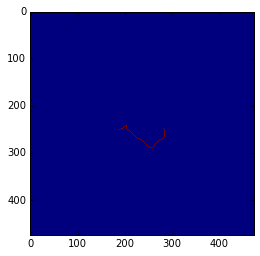

In [33]:
imshow(new_merge_errors[0][3][0][1])

In [34]:
m_file_new = '/home/d/dojo_xp/data/merges_new_cnn.p'
bigM_file_new = '/home/d/dojo_xp/data/bigM_new_cnn.p'

In [35]:
with open(m_file_new, 'wb') as f:
    pickle.dump(new_merge_errors, f)

In [36]:
with open(bigM_file_new, 'wb') as f:
    pickle.dump(bigM_dojo, f)

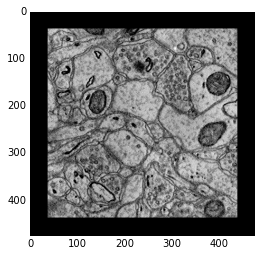

In [17]:
imshow(input_image[0],cmap='gray')

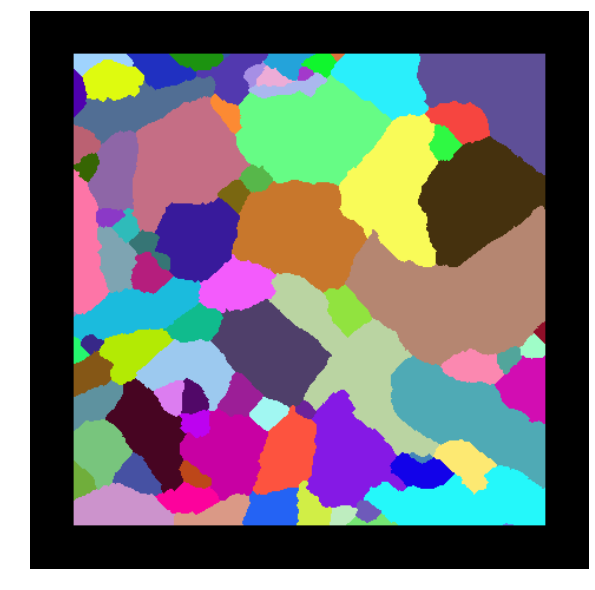

In [21]:
gp.Util.view(input_rhoana[0],large=True)

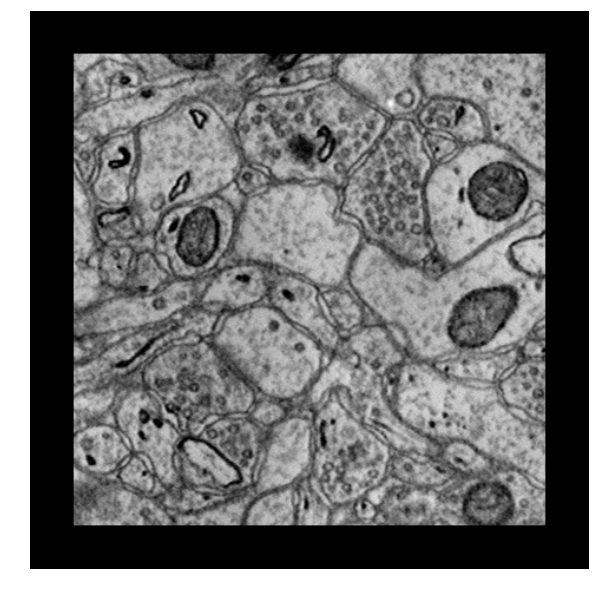

In [23]:
gp.Util.view(input_image[0],large=True, color=False)

In [25]:
m_file_old = '/home/d/dojo_xp/data/merges_new_cnn.p'

In [26]:
with open(os.path.join(m_file_old), 'rb') as f:
    merge_errors = pickle.load(f)

sorted_m_e = sorted(merge_errors, key=lambda x: x[3], reverse=False)

In [27]:
sorted_m_e

[(0,
  40,
  2.4198363046155796e-21,
  [(2.4198363046155796e-21,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ..., 
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]], dtype=bool)),
   (2.4198363046155796e-21,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ..., 
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]], dtype=bool)),
   (2.4198363046155796e-21,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..

In [37]:
new_merge_errors

[(0,
  40,
  1.2539216331930447e-09,
  [(1.2539216331930447e-09,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ..., 
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]], dtype=bool)),
   (1.2539216331930447e-09,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ..., 
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]], dtype=bool)),
   (1.2539216331930447e-09,
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..

In [48]:
mbigM, mrhoana, rhoanas = gp.Legacy.perform_auto_merge_correction(net, bigM_dojo, input_image, input_prob, input_rhoana, new_merge_errors, .05)

fixing 1.25392163319e-09
fixing 0.0360888727009
fixing 0.036937456578
fixing 0.00606872793287
fixing 1.77100162091e-06
fixing 0.00174562365282


In [49]:
len(rhoanas)

6

In [50]:
for i in range(len(rhoanas)):
    print VI(input_gold, rhoanas[i])

(0.51178119555517143, 0.4763612343909136, [0.42861096031621226, 0.4293922557471461, 0.41812625771753, 0.4176715560855522, 0.49071969954324857, 0.46200276923857864, 0.5851840840738847, 0.6340148263120815, 0.6552543410401137, 0.5968352054773662])
(0.51135262340916632, 0.4763612343909136, [0.42861096031621226, 0.4293922557471461, 0.41812625771753, 0.4176715560855522, 0.49071969954324857, 0.46200276923857864, 0.5808983626138344, 0.6340148263120815, 0.6552543410401137, 0.5968352054773662])
(0.51204400759190549, 0.4763612343909136, [0.42861096031621226, 0.4293922557471461, 0.41812625771753, 0.4176715560855522, 0.49071969954324857, 0.46200276923857864, 0.5878122044412262, 0.6340148263120815, 0.6552543410401137, 0.5968352054773662])
(0.51071466124961307, 0.4763612343909136, [0.42861096031621226, 0.4293922557471461, 0.41812625771753, 0.4176715560855522, 0.49071969954324857, 0.46200276923857864, 0.5878122044412262, 0.6207213628891566, 0.6552543410401137, 0.5968352054773662])
(0.50890521348916495

In [43]:
  def VI(gt, seg):
      # total_vi = 0
      slice_vi = []    
      for i in range(10):
          current_vi = gp.Util.vi(gt[i].astype(np.int64), seg[i].astype(np.int64))
          # total_vi += current_vi
          slice_vi.append(current_vi)
      # total_vi /= 10
      return np.mean(slice_vi), np.median(slice_vi), slice_vi


In [46]:
import numpy as np